<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import pandas as pd
import numpy as np
# from matplotlib.cm import get_cmap


# mpl.rcParams.update(mpl.rcParamsDefault) #to reset style
style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')



In [2]:
#read the output file
df = pd.read_csv("output1D.csv")
df.head()



,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.000000
1,1,200,5,1D,normal,Candidate 0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 2,1.0040675638805894,Candidate 0,1.0,Candidate 0,1.0,Candidate 2,1.004068
2,2,200,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.000000
3,3,200,5,1D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.000000
4,4,200,5,1D,normal,Candidate 4,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.0181561532430627,Candidate 4,1.0,Candidate 0,1.0181561532430627,Candidate 0,1.018156


In [3]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")


In [4]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.000000
1,1,200,5,1D,normal,Candidate 0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 0,1.000000,Candidate 2,1.004068
2,2,200,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.000000
3,3,200,5,1D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.000000
4,4,200,5,1D,normal,Candidate 4,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 0,1.018156


In [5]:
main = df.loc[df["Distribution"]=="normal"].groupby(["m","Dimension"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
main

,m,Dimension,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,1D,1.096140,1.671752,1.000293,1.022035,1.033406,1.302267,1.010214,1.226175,1.006137,1.203442,1.001933,1.058260
1,10,1D,1.196452,2.042449,1.000195,1.019448,1.058605,1.319980,1.007366,1.234456,1.009202,1.128989,1.001842,1.098343
2,30,1D,1.350157,2.354005,1.000162,1.017441,1.061781,1.370657,1.003771,1.054874,1.013976,1.189937,1.000724,1.019059
3,50,1D,1.388022,2.614240,1.000104,1.008558,1.063073,1.320630,1.002876,1.054483,1.012786,1.110245,1.000525,1.015779
4,75,1D,1.387827,2.737965,1.000054,1.003813,1.073579,1.366063,1.002063,1.035162,1.012952,1.149830,1.000521,1.011693
5,100,1D,1.389348,2.893028,1.000045,1.002224,1.061275,1.375926,1.001796,1.025796,1.010772,1.086444,1.000488,1.005471


In [6]:
#group by  n, m
group_by_m_n_normal = df.loc[df['Distribution'] == "normal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_uniform = df.loc[df['Distribution'] == "uniform"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_poisson = df.loc[df['Distribution'] == "poisson"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


In [7]:
group_by_m_n_normal.head()


,m,n,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,200,1.096140,1.671752,1.000293,1.022035,1.033406,1.302267,1.010214,1.226175,1.006137,1.203442,1.001933,1.058260
1,10,200,1.196452,2.042449,1.000195,1.019448,1.058605,1.319980,1.007366,1.234456,1.009202,1.128989,1.001842,1.098343
2,30,200,1.350157,2.354005,1.000162,1.017441,1.061781,1.370657,1.003771,1.054874,1.013976,1.189937,1.000724,1.019059
3,50,200,1.388022,2.614240,1.000104,1.008558,1.063073,1.320630,1.002876,1.054483,1.012786,1.110245,1.000525,1.015779
4,75,200,1.387827,2.737965,1.000054,1.003813,1.073579,1.366063,1.002063,1.035162,1.012952,1.149830,1.000521,1.011693


In [8]:
group_by_distribution_m5  = df.loc[df['m'] == 5].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m10  = df.loc[df['m'] == 10].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m50  = df.loc[df['m'] == 50].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m100  = df.loc[df['m'] == 100].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))


In [18]:
group_by_distribution_m10  = df.loc[df['m'] == 10].groupby("Distribution").agg(Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_max = ("Borda Distortion", "max"),  PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m10

,Plurality_Distortion_max,Copeland_Distortion_max,STV_Distortion_max,Borda_Distortion_max,PluralityVeto_Distortion_max
Distribution,,,,,
bimodal,1.718800,1.108121,1.478676,1.299773,1.158369
normal,2.042449,1.019448,1.319980,1.234456,1.098343
poisson,1.888372,1.083978,1.498925,1.422442,1.158301
uniform,2.107611,1.015795,1.424992,1.296826,1.074823


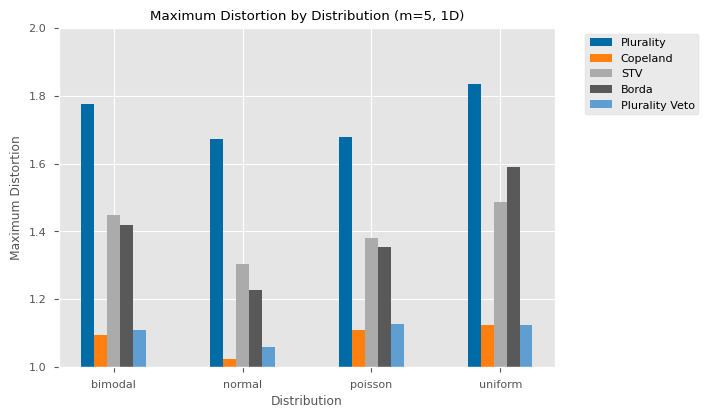

In [11]:
# Extract the data
distribution = group_by_distribution_m5.index
plurality_max = group_by_distribution_m5["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m5["Copeland_Distortion_max"]
stv_max = group_by_distribution_m5["STV_Distortion_max"]
borda_max = group_by_distribution_m5["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m5["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



at m=5, uniform distribution has highest distortion for copeland (but also for other rules as well)
copeland seems to do even better than plurality veto in all cases 

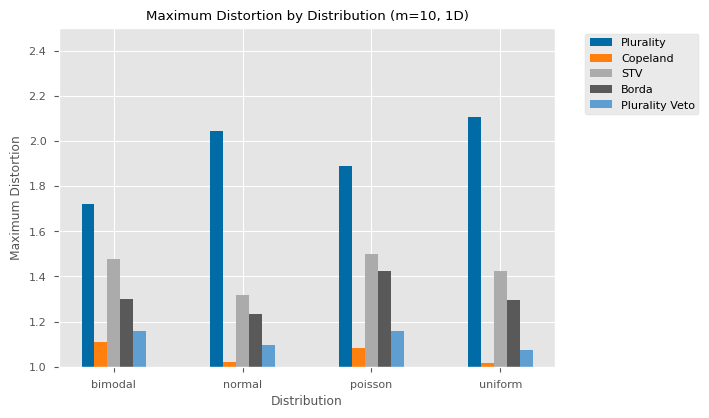

In [12]:
distribution = group_by_distribution_m10.index
plurality_max = group_by_distribution_m10["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m10["Copeland_Distortion_max"]
stv_max = group_by_distribution_m10["STV_Distortion_max"]
borda_max = group_by_distribution_m10["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m10["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

bimodal has highest distortion
copeland better than pv

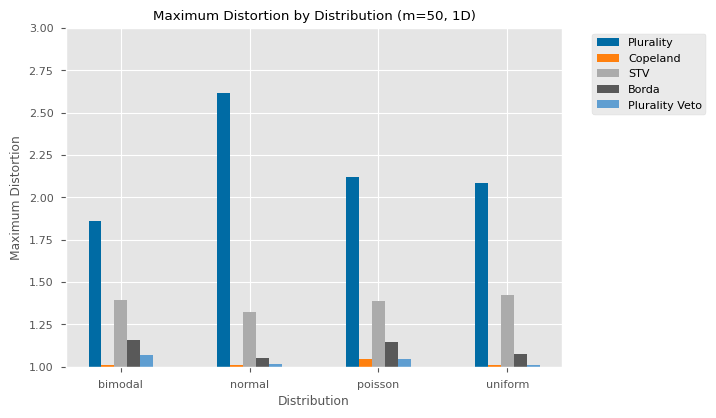

In [13]:
distribution = group_by_distribution_m50.index
plurality_max = group_by_distribution_m50["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m50["Copeland_Distortion_max"]
stv_max = group_by_distribution_m50["STV_Distortion_max"]
borda_max = group_by_distribution_m50["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m50["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

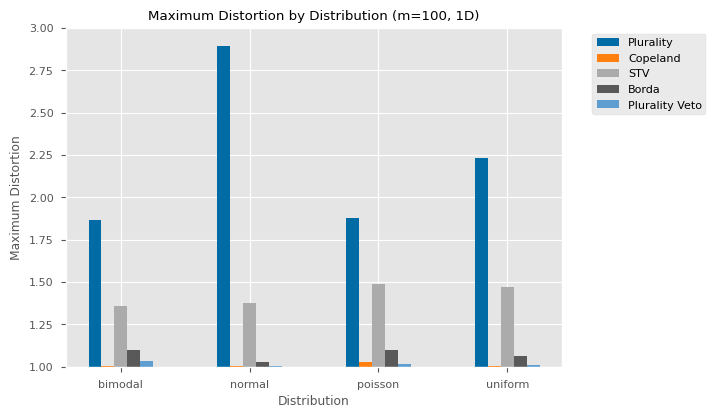

In [14]:
distribution = group_by_distribution_m100.index
plurality_max = group_by_distribution_m100["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m100["Copeland_Distortion_max"]
stv_max = group_by_distribution_m100["STV_Distortion_max"]
borda_max = group_by_distribution_m100["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m100["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [15]:

# Extract the data
distribution = group_by_distribution_m5.index
plurality_avg = group_by_distribution_m5["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m5["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m5["STV_Distortion_avg"]
borda_avg = group_by_distribution_m5["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m5["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

KeyError: 'Plurality_Distortion_avg'

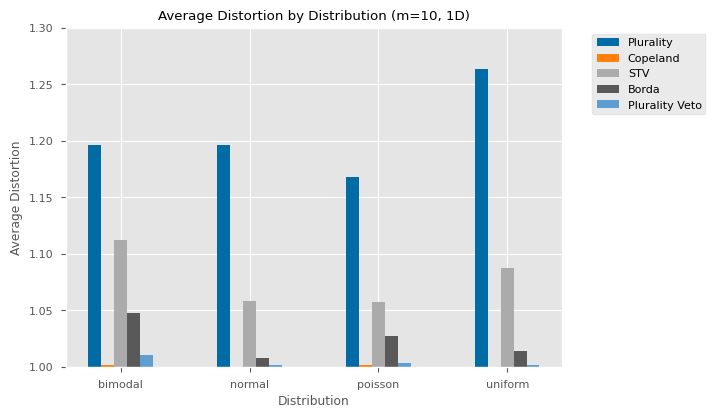

In [ ]:
# Extract the data
distribution = group_by_distribution_m10.index
plurality_avg = group_by_distribution_m10["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m10["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m10["STV_Distortion_avg"]
borda_avg = group_by_distribution_m10["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m10["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

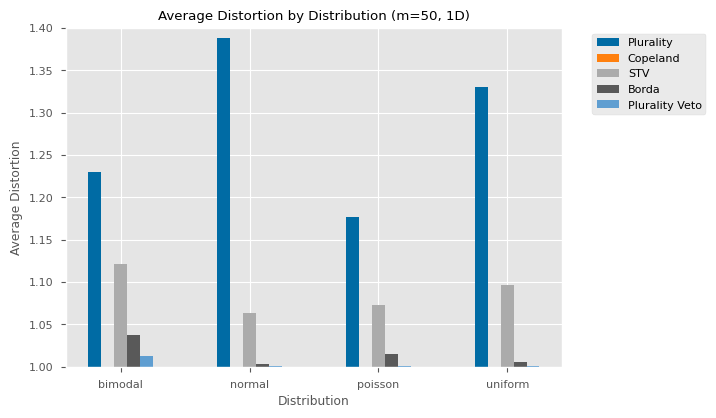

In [ ]:
# Extract the data
distribution = group_by_distribution_m50.index
plurality_avg = group_by_distribution_m50["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m50["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m50["STV_Distortion_avg"]
borda_avg = group_by_distribution_m50["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m50["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

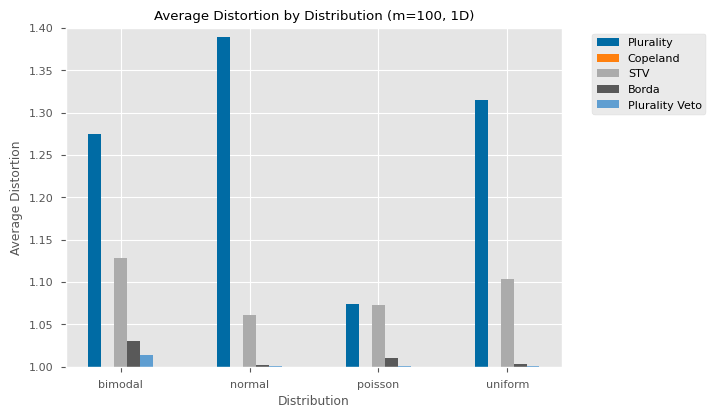

In [ ]:
# Extract the data
distribution = group_by_distribution_m100.index
plurality_avg = group_by_distribution_m100["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m100["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m100["STV_Distortion_avg"]
borda_avg = group_by_distribution_m100["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m100["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
# group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m_normal = df.loc[df['Distribution'] == "normal"].groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_uniform = df.loc[df['Distribution'] == "uniform"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_poisson = df.loc[df['Distribution'] == "poisson"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


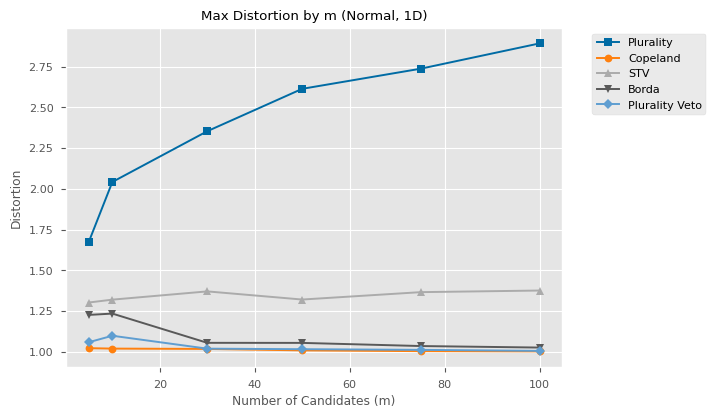

In [ ]:
#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Max Distortion by m (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

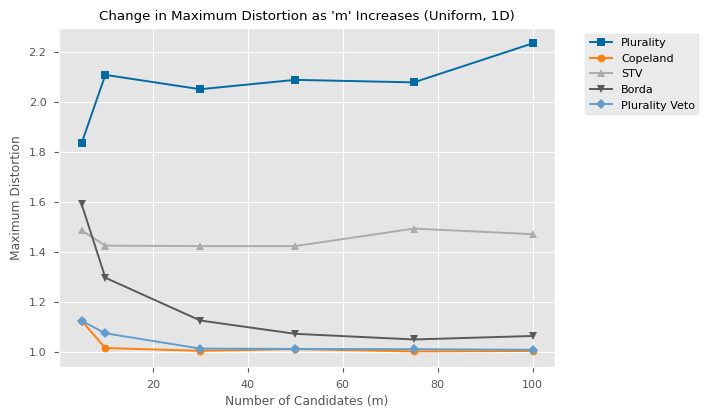

In [ ]:
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


# Show the plot
plt.show()

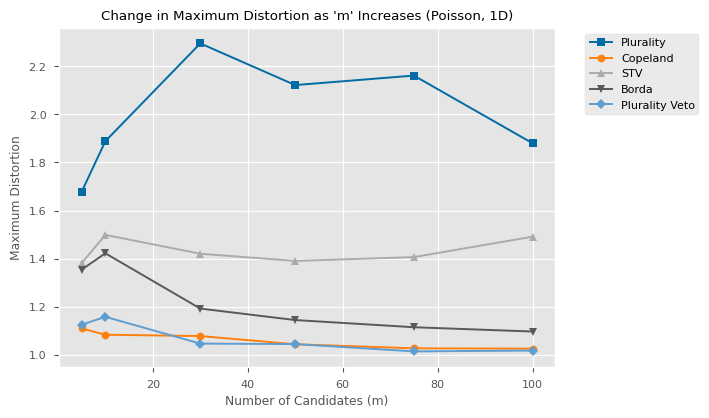

In [ ]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

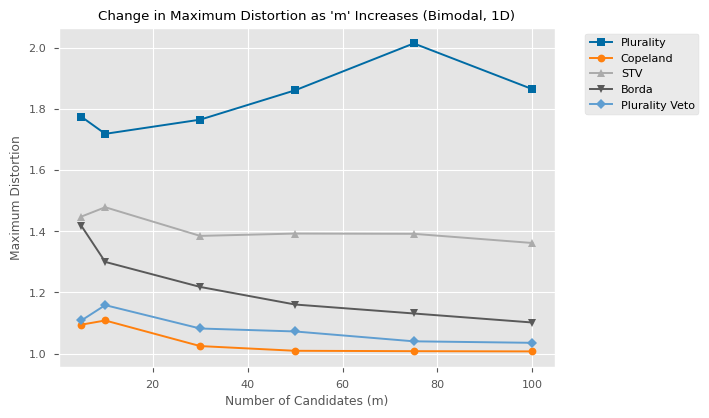

In [ ]:

plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

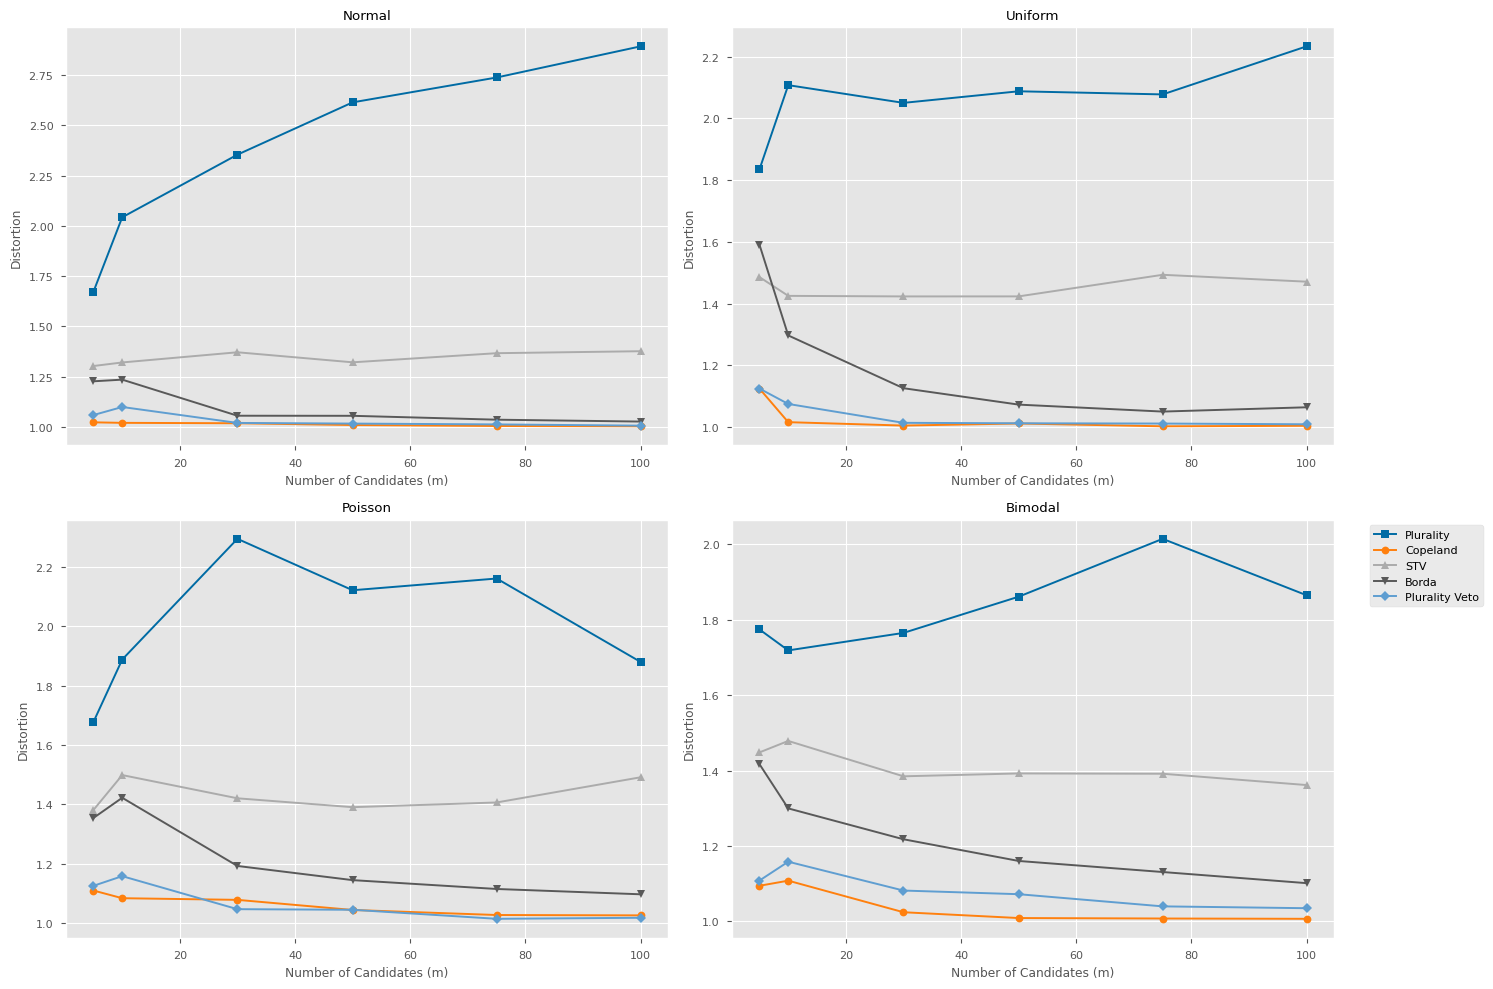

In [ ]:
distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]

plt.figure(figsize=(15,10))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

    elif distribution == 'Normal':
        plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

    elif distribution == 'Poisson':
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

    elif distribution == 'Uniform':
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])


    plt.title(f'{distribution}')
    plt.xlabel("Number of Candidates (m)")
    plt.ylabel("Distortion")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

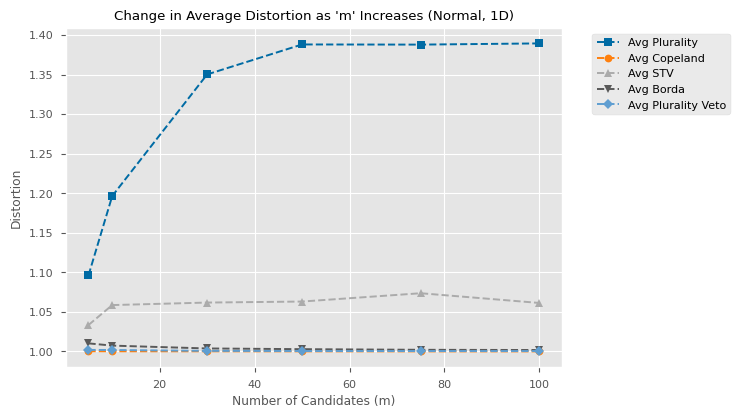

In [ ]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

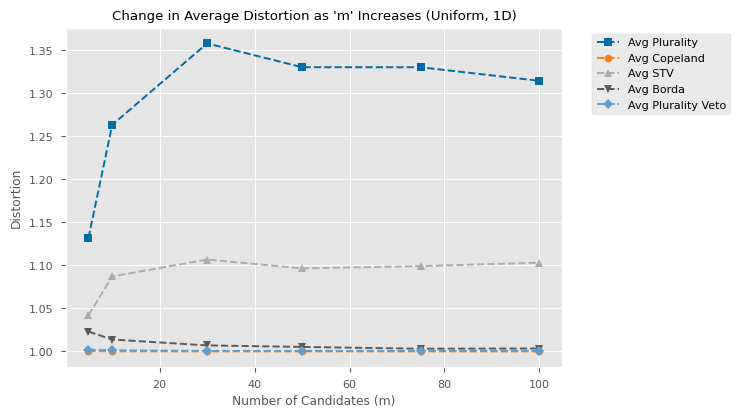

In [ ]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

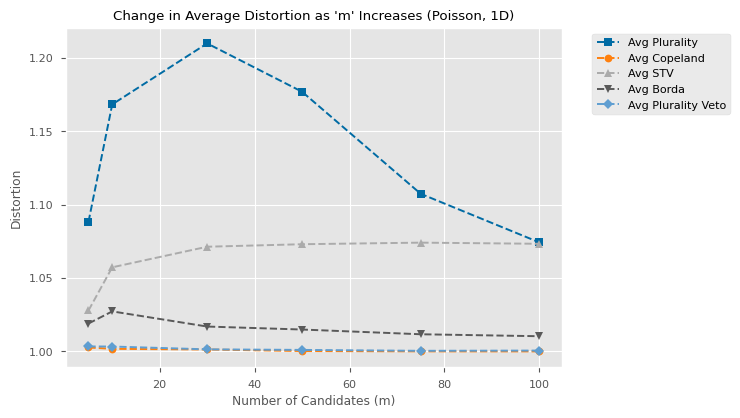

In [ ]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

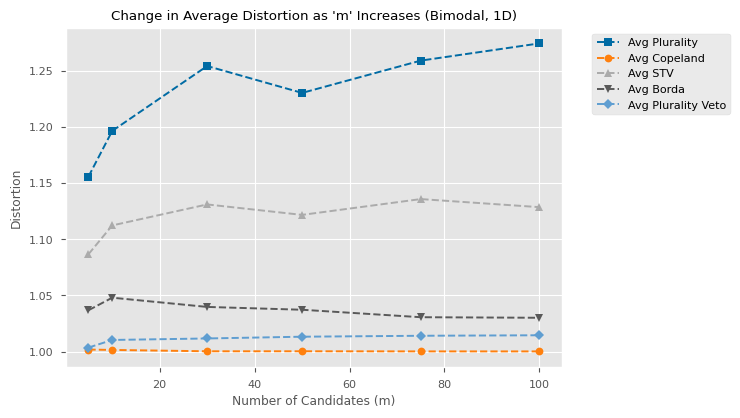

In [ ]:
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

In [ ]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

In [ ]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [ ]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution_m5 = df.loc[df['m'] == 5].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m10 = df.loc[df['m'] == 10].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m50 = df.loc[df['m'] == 50].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m100 = df.loc[df['m'] == 100].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [ ]:
accuracy_by_distribution_m5

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,bimodal,9.6,92.0,19.6,86.6,61.8,86.0
1,normal,40.8,96.0,56.0,78.4,82.0,88.4
2,poisson,51.6,92.6,68.0,70.4,75.2,89.0
3,uniform,39.0,96.4,57.8,84.0,76.2,88.8


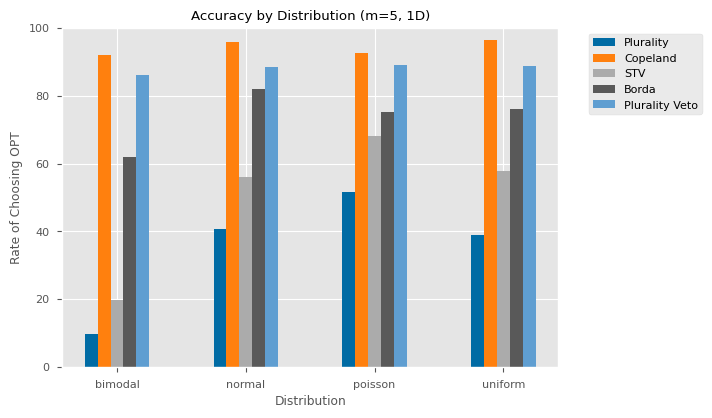

In [ ]:
# Extract the data
distribution = accuracy_by_distribution_m5["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m5["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m5["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m5["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m5["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


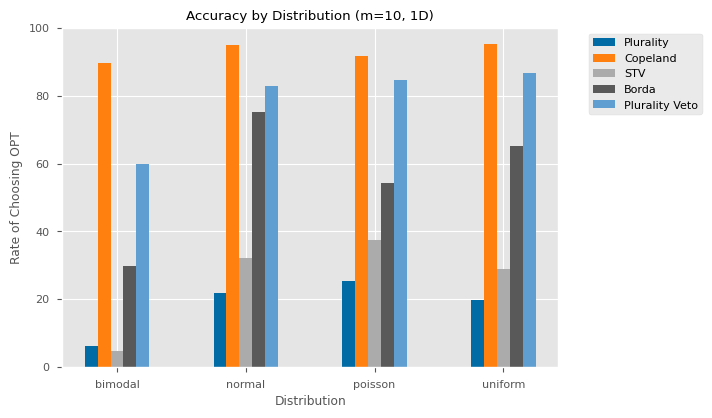

In [ ]:
# Extract the data
distribution = accuracy_by_distribution_m10["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m10["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m10["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m10["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m10["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

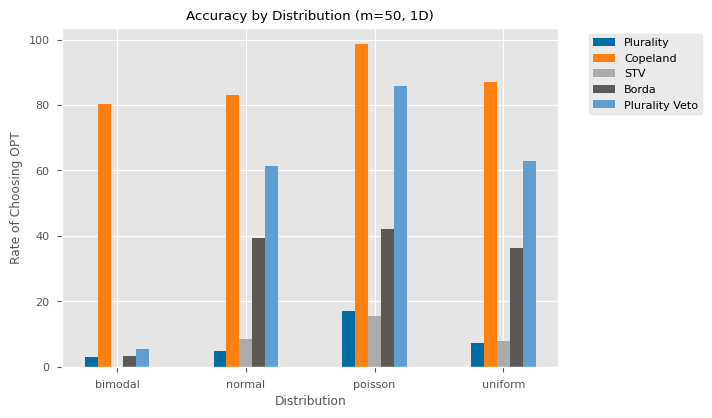

In [ ]:
# Extract the data
distribution = accuracy_by_distribution_m50["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m50["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m50["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m50["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m50["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m50["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

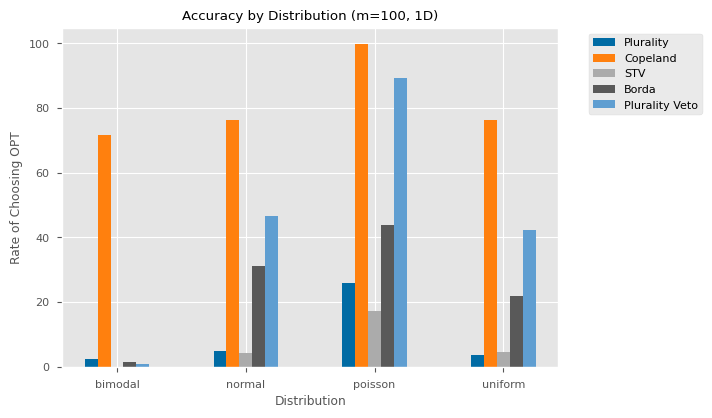

In [ ]:
# Extract the data
distribution = accuracy_by_distribution_m100["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m100["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m100["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m100["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m100["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m100["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

While the differences in distortion are not substantial, Copeland outperforms other methods in terms of accurately selecting the OPT, achieving an accuracy rate of approximately 70-80%.
In contrast, Plurality exhibits the lowest accuracy, with only about 10-30% accuracy in selecting the OPT.

In [ ]:
# Define the target value
target_value = 1

# Group by 'm' and calculate the percentage of each methods choosing the OPT
accuracy_by_m_normal = df.loc[df['Distribution'] == 'normal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_uniform = df.loc[df['Distribution'] == 'uniform'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_poisson = df.loc[df['Distribution'] == 'poisson'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

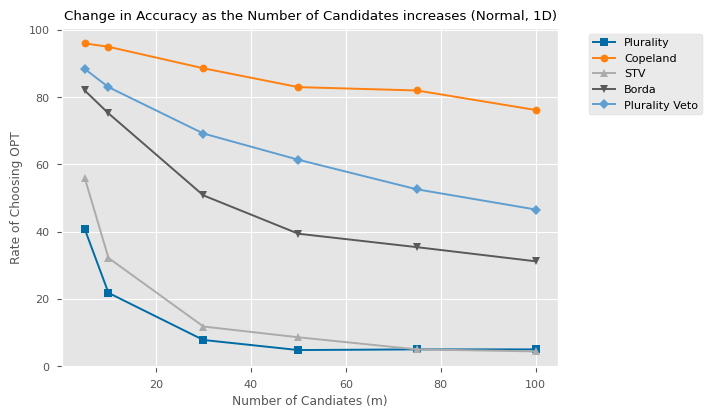

In [ ]:
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

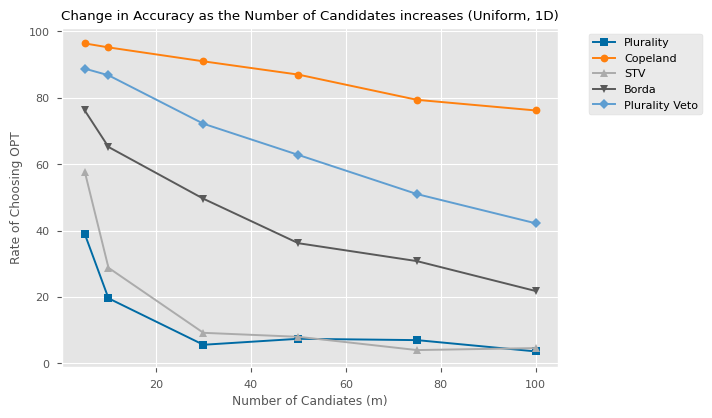

In [ ]:
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

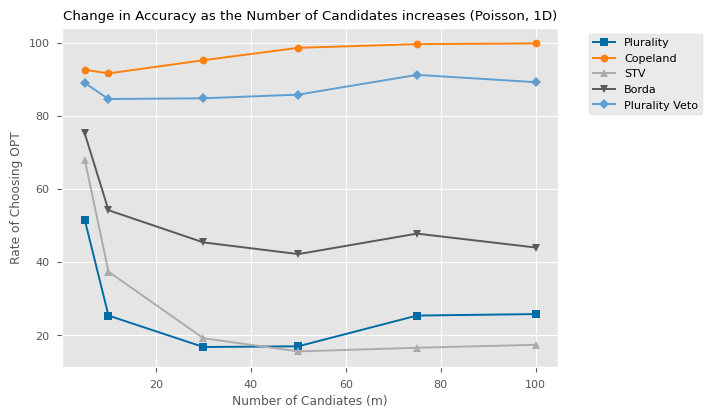

In [ ]:
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

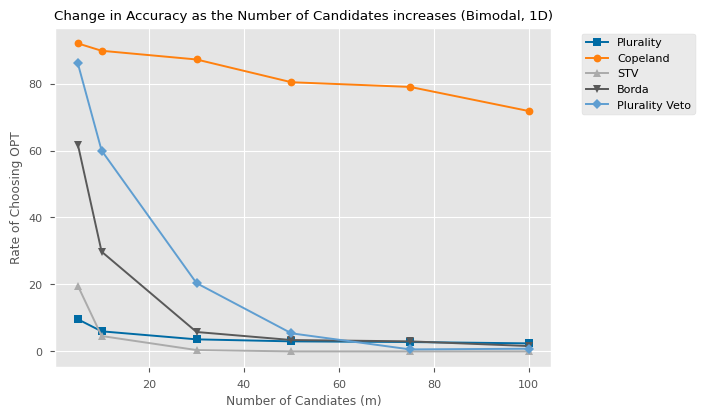

In [ ]:
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
df = pd.read_csv("output1D+2D.csv")
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.head()


,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.000000
1,1,200,5,1D,normal,Candidate 0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 0,1.000000,Candidate 2,1.004068
2,2,200,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.000000
3,3,200,5,1D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.000000
4,4,200,5,1D,normal,Candidate 4,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 0,1.018156


In [ ]:
target_value = 1


main = df.loc[df["Distribution"]=="normal"].groupby(["m","Dimension"]).agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

# main2 = df_2D.loc[df_2D["Distribution"]=="normal"].groupby("m").agg(
#     Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
#     Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
#     STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
#     STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
#     Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
#     PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

# )
    
# main.at[5, "m"] = 5
# main.at[10,"m"] = 10
# main.at[30,"m"] = 30
# main.at[50,"m"] = 50
# main.at[75,"m"] = 70
# main.at[100,"m"] = 100
# main['m'] = main['m'].astype(int)



In [ ]:

df = pd.DataFrame(main)
df.insert(0,"m",[5,5,10,10,30,30,50,50,75,75,100,100])
df.insert(1,"Dimension",["1D","2D","1D","2D","1D","2D","1D","2D","1D","2D","1D","2D"])

# main
df


m Dimension  Plurality_percentage  Copeland_percentage  \
m   Dimension                                                             
5   1D           5        1D                  40.8                 96.0   
    2D           5        2D                  60.5                 95.0   
10  1D          10        1D                  21.8                 95.0   
    2D          10        2D                  29.9                 92.3   
30  1D          30        1D                   7.8                 88.6   
    2D          30        2D                   8.2                 88.6   
50  1D          50        1D                   4.8                 83.0   
    2D          50        2D                   4.5                 85.5   
75  1D          75        1D                   5.0                 82.0   
    2D          75        2D                   2.8                 79.4   
100 1D         100        1D                   5.0                 76.2   
    2D         100        2D                   2.6                 79.8   

               STV_percentage  STAR_percentage  Borda_percentage  \
m   Dimension                                                      
5   1D                   56.0             78.4              82.0   
    2D                   79.3             89.5              88.7   
10  1D                   32.2             56.6              75.2   
    2D                   51.1             86.0              82.0   
30  1D                   11.8             23.2              50.8   
    2D                   15.2             64.2              80.0   
50  1D                    8.6             10.0              39.4   
    2D                    7.9             52.1              77.5   
75  1D                    5.0              6.8              35.4   
    2D                    5.6             45.0              78.2   
100 1D                    4.4              4.4              31.2   
    2D                    3.4             37.0              74.0   

               PluralityVeto_percentage  
m   Dimension                            
5   1D                             88.4  
    2D                             90.8  
10  1D                             83.0  
    2D                             80.3  
30  1D                             69.2  
    2D                             61.7  
50  1D                             61.4  
    2D                             55.9  
75  1D                             52.6  
    2D                             42.6  
100 1D                             46.6  
    2D                             37.0

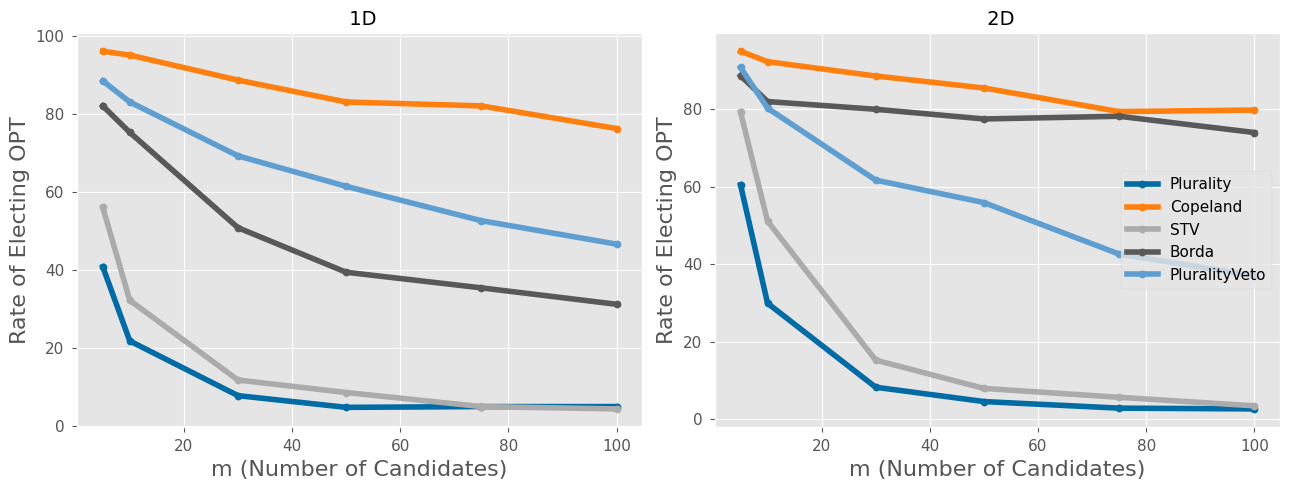

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

efficiency_columns = ['Plurality_percentage', 'Copeland_percentage', 'STV_percentage',\
                    'Borda_percentage', 'PluralityVeto_percentage',  ]


voting_rules = ['Plurality', "Copeland",'STV', 
                       'Borda', 'PluralityVeto']
for i, dimension_value in enumerate(["1D","2D"]):
    df_dimension = df[df['Dimension'] == dimension_value]
    ax = axes[i]
    ax.set_title(f' {dimension_value}', fontsize=14)
    for j,efficiency_type in enumerate(efficiency_columns):
        ax.plot(df_dimension['m'], df_dimension[efficiency_type], marker='o', label=voting_rules[j], linewidth=4)
    ax.set_xlabel('m (Number of Candidates)', fontsize=16)
    ax.set_ylabel('Rate of Electing OPT', fontsize=16)
    ax.grid(True)
    ax.tick_params(labelsize=11) 

ax.legend(fontsize=11)


plt.tight_layout()
plt.show()

In [ ]:
# visualize graphs with different m and n
df = pd.read_csv("output1D_different_n.csv")
df.head()


,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,5,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.000000,Candidate 2,1.2987292955438525,Candidate 3,1.0
1,1,5,5,1D,normal,Candidate 1,Candidate 2,1.774887,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0
2,2,5,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 1,1.267935,Candidate 3,1.0,Candidate 3,1.0
3,3,5,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0
4,4,5,5,1D,normal,Candidate 2,Candidate 3,1.313974,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0


In [ ]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")

In [ ]:
main = df.groupby(["m","n"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
main

,m,n,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,5,1.102601,2.621977,1.006973,1.525773,1.038115,1.770598,1.033039,2.621977,1.016705,1.769231,1.018410,2.076278
1,5,25,1.111461,2.141616,1.004187,1.442962,1.048214,1.488442,1.023639,1.681508,1.008613,1.359926,1.008848,1.442962
2,5,50,1.108868,1.917146,1.003148,1.210363,1.036891,1.502703,1.020583,1.628205,1.007450,1.398666,1.005674,1.277202
3,5,75,1.114680,1.917011,1.001976,1.222759,1.049785,1.546450,1.020940,1.648811,1.006982,1.323211,1.004599,1.222759
4,5,100,1.114468,2.009687,1.001977,1.206552,1.041585,1.480099,1.021310,1.498322,1.005908,1.326769,1.004147,1.206552
5,5,200,1.118320,2.019653,1.001332,1.132008,1.048459,1.410348,1.024562,1.508215,1.004972,1.245240,1.003799,1.173961
6,10,5,1.160921,3.888865,1.004904,1.666667,1.054428,1.767408,1.037768,2.006474,1.026594,1.818182,1.019729,1.666667
7,10,25,1.176068,2.536431,1.002694,1.200000,1.075059,1.608696,1.024628,1.632423,1.011255,1.367089,1.007444,1.415687
8,10,50,1.189909,2.410359,1.001649,1.158065,1.066625,1.497351,1.022889,1.471910,1.009386,1.183575,1.005347,1.184620
9,10,75,1.202231,2.175999,1.001430,1.183288,1.074295,1.576923,1.021610,1.495968,1.010266,1.260679,1.004467,1.173329


In [ ]:
group_by_m_n_normal = df.loc[df["Distribution"] == 'normal'].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_uniform = df.loc[df["Distribution"] == 'uniform'].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_poisson = df.loc[df["Distribution"] == 'poisson'].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_bimodal = df.loc[df["Distribution"] == 'bimodal'].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


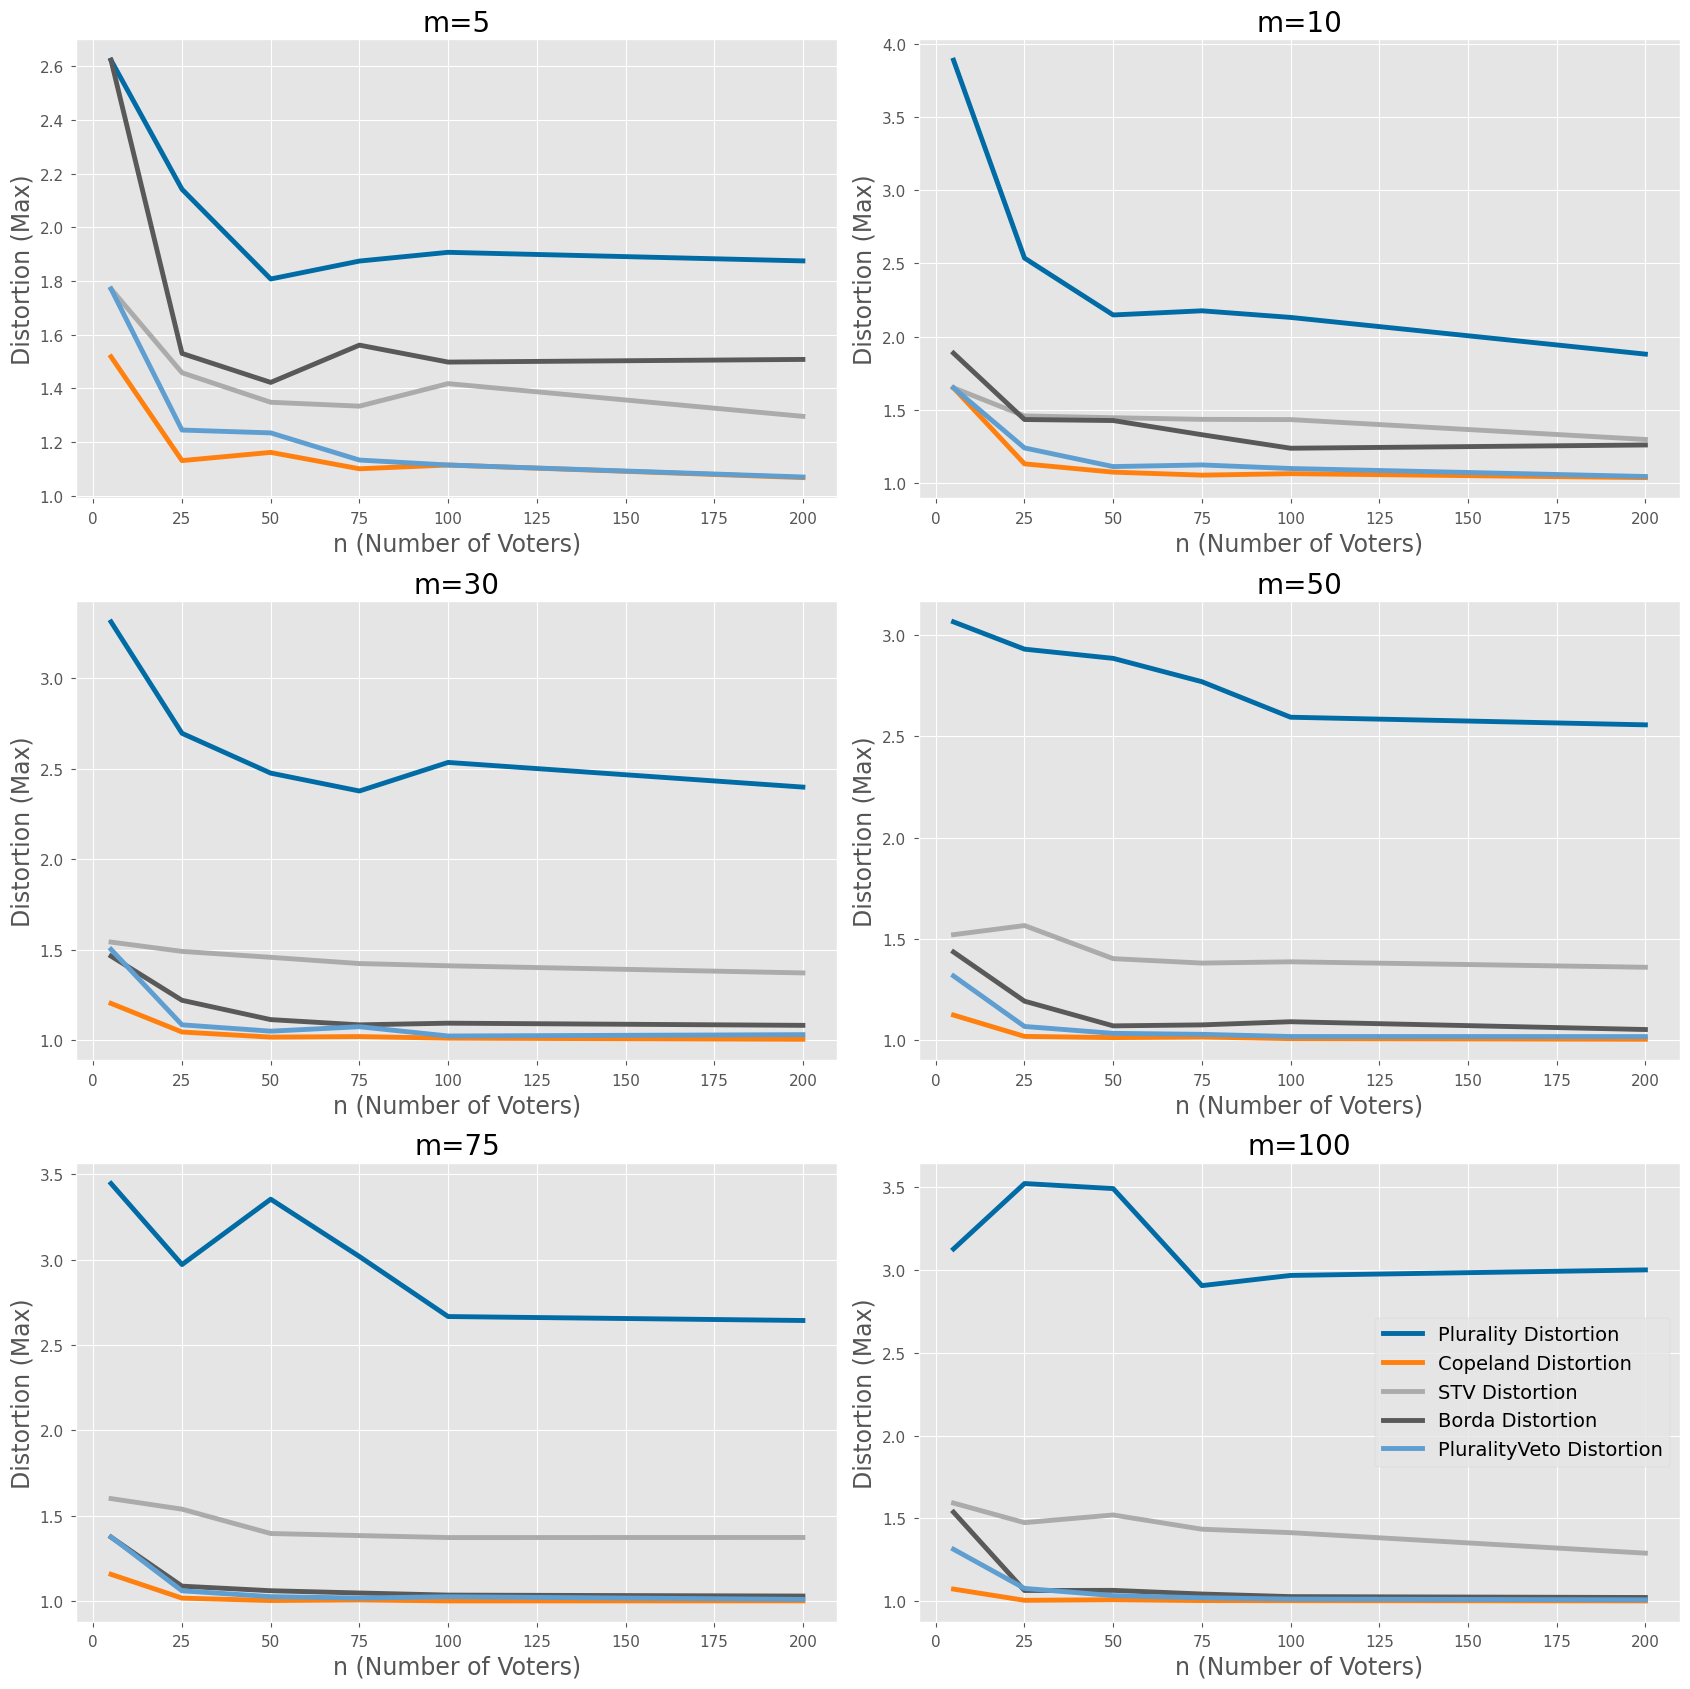

In [ ]:
df = pd.DataFrame(group_by_m_n_normal)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(17, 17))

for i, m_value in enumerate(df['m'].unique()):
    m_df = df[df['m'] == m_value]
    row = i // 2
    col = i % 2
    m_df = df[df['m'] == m_value]
    ax = axs[row, col]
    ax.plot(m_df['n'], m_df['Plurality_Distortion_max'], marker='x', label=f"Plurality Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['Copeland_Distortion_max'], marker='x', label=f"Copeland Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['STV_Distortion_max'], marker='x', label=f"STV Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['Borda_Distortion_max'], marker='x', label=f"Borda Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['PluralityVeto_Distortion_max'], marker='x', label=f"PluralityVeto Distortion", linewidth=3.5)
    ax.set_title(f"m={m_value}", fontsize=20)
    ax.set_xlabel('n (Number of Voters)', fontsize=17)
    ax.set_ylabel('Distortion (Max)', fontsize=17)
    ax.tick_params(labelsize=11) 


ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

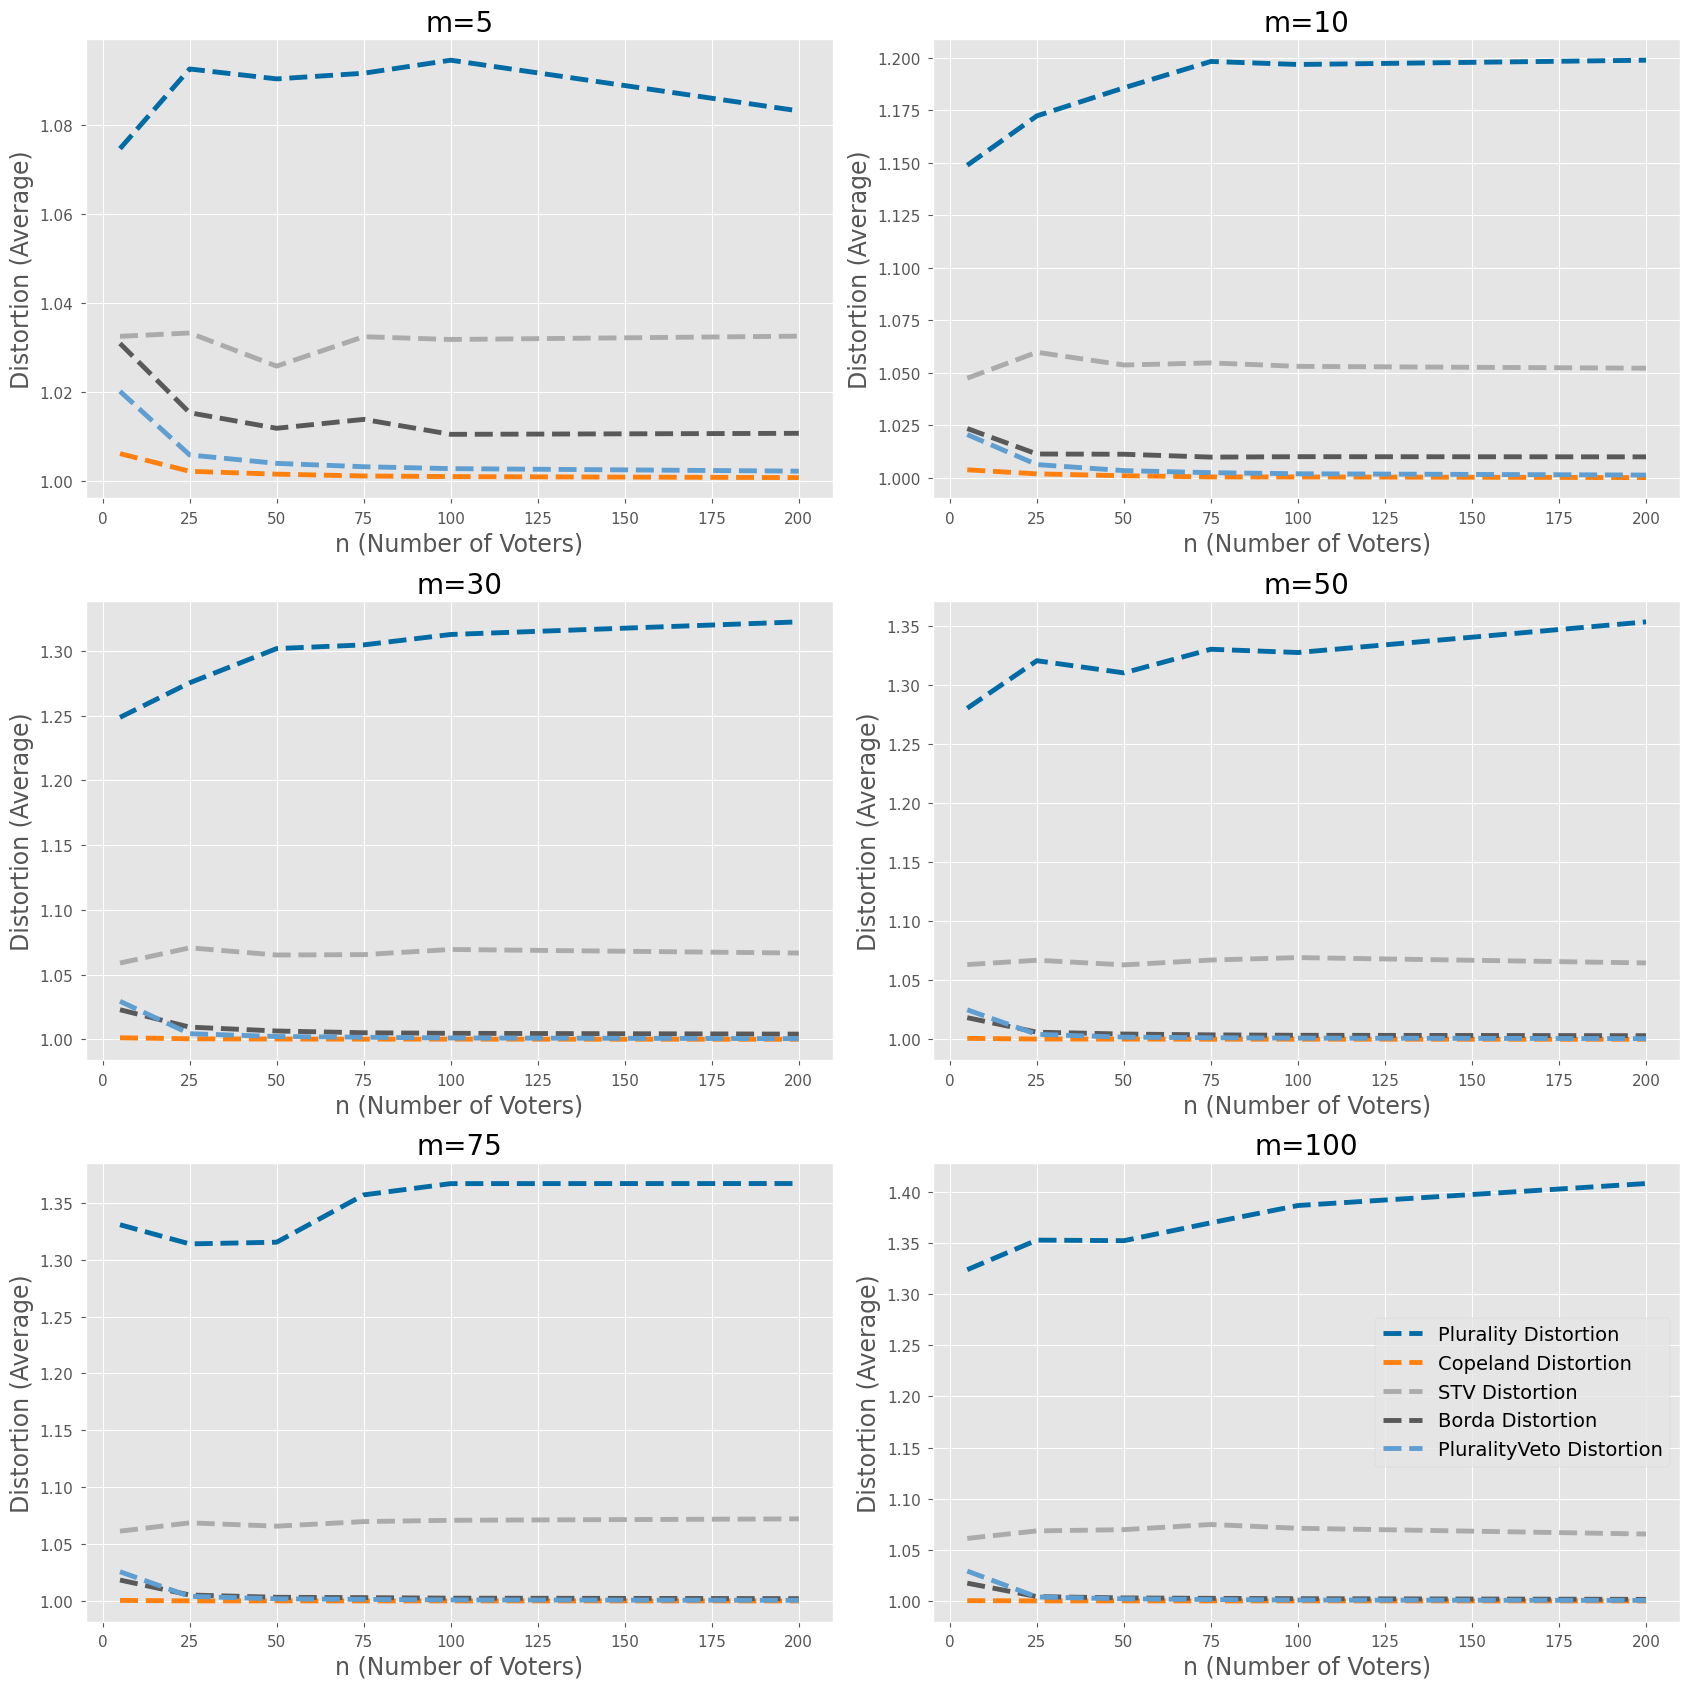

In [ ]:
df = pd.DataFrame(group_by_m_n_normal)

styles2 = ['--','--','--', '--','--']

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(17, 17))

for i, m_value in enumerate(df['m'].unique()):
    m_df = df[df['m'] == m_value]
    row = i // 2
    col = i % 2
    m_df = df[df['m'] == m_value]
    ax = axs[row, col]
    ax.plot(m_df['n'], m_df['Plurality_Distortion_avg'], styles2[0], marker='x', label=f"Plurality Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['Copeland_Distortion_avg'], styles2[1], marker='x', label=f"Copeland Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['STV_Distortion_avg'], styles2[2], marker='x', label=f"STV Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['Borda_Distortion_avg'], styles2[3], marker='x', label=f"Borda Distortion", linewidth=3.5)
    ax.plot(m_df['n'], m_df['PluralityVeto_Distortion_avg'], styles2[4], marker='x', label=f"PluralityVeto Distortion", linewidth=3.5)

    ax.set_title(f"m={m_value}", fontsize=20)
    ax.set_xlabel('n (Number of Voters)', fontsize=17)
    ax.set_ylabel('Distortion (Average)', fontsize=17)
    ax.tick_params(labelsize=11) 

ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

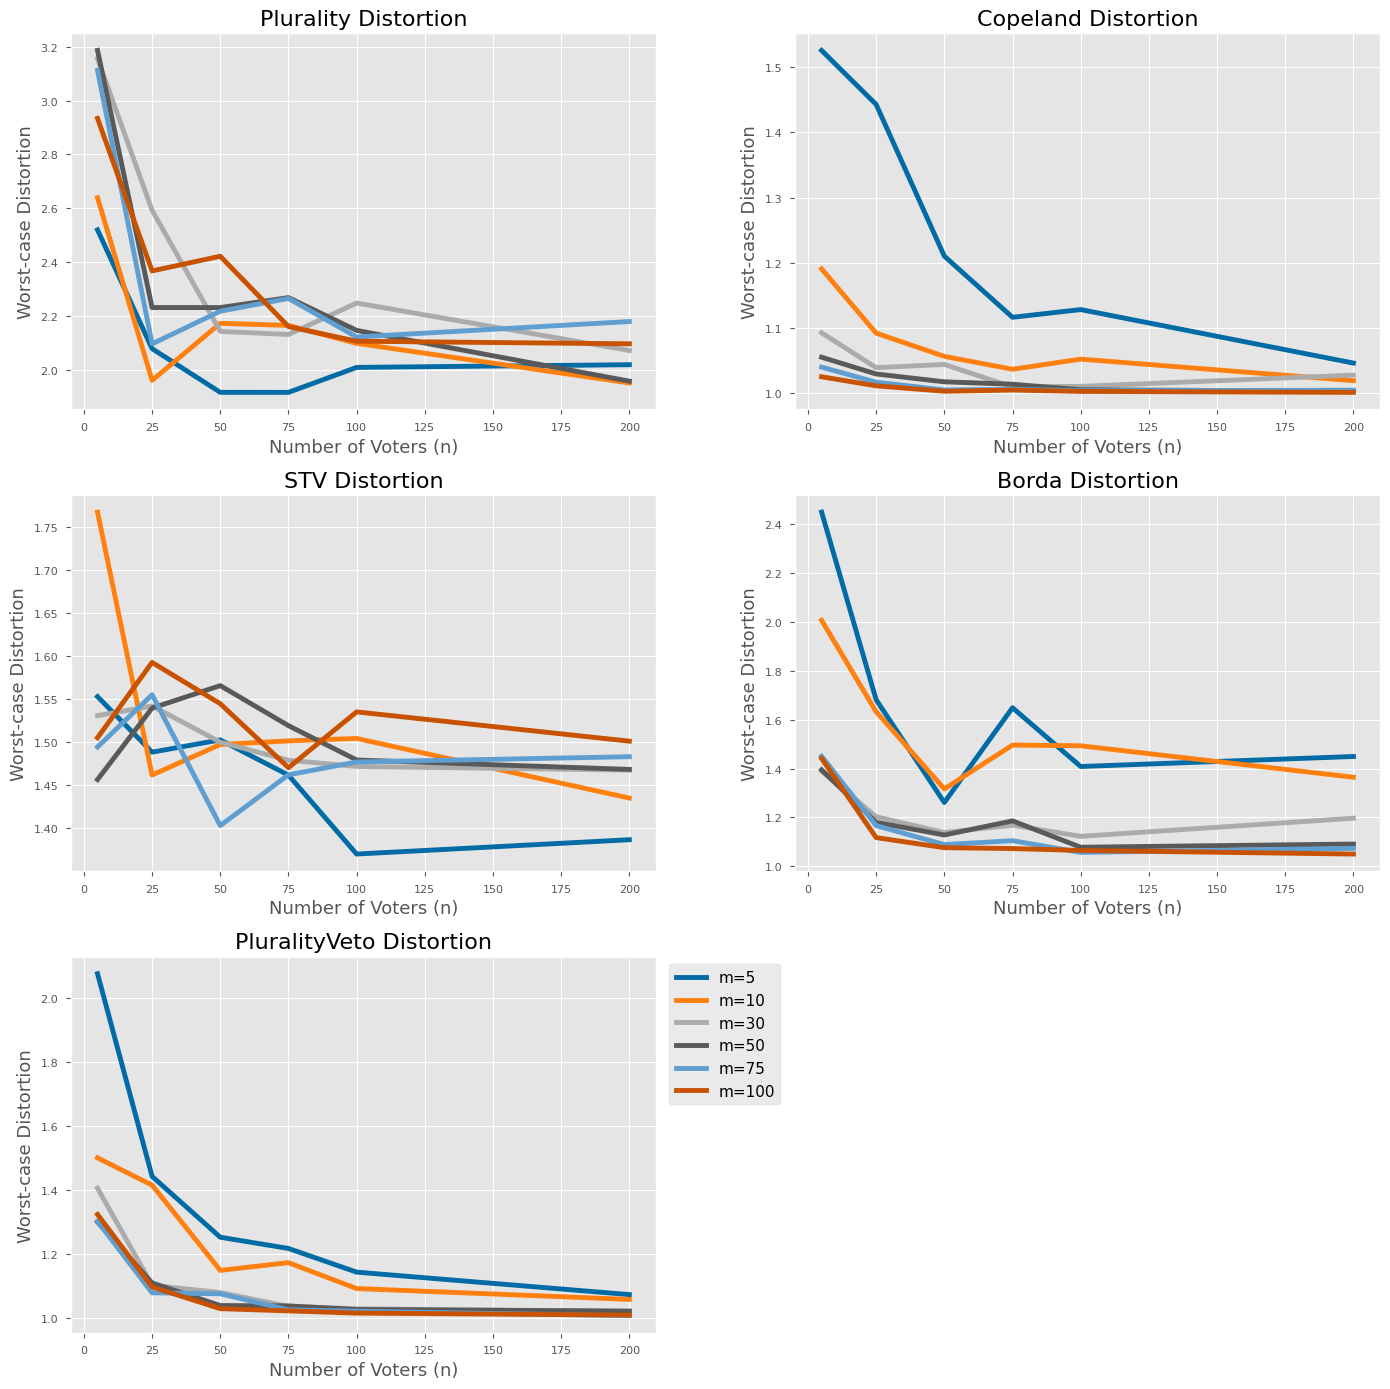

In [ ]:
# uniform distribution
votings = ["Plurality_Distortion_max", 'Copeland_Distortion_max', 'STV_Distortion_max', 'Borda_Distortion_max', 'PluralityVeto_Distortion_max']
titles = ["Plurality Distortion", 'Copeland Distortion', 'STV Distortion', 'Borda Distortion', 'PluralityVeto Distortion']

plt.figure(figsize=(14, 14))
for i, mechanism in enumerate(votings, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each mechanism

    for m in group_by_m_n_uniform['m'].unique():
        subset = group_by_m_n_uniform[group_by_m_n_uniform['m'] == m]
        plt.plot(subset['n'], subset[mechanism], label=f'm={m}', linewidth=3.5)

    plt.xlabel("Number of Voters (n)", fontsize=13)
    plt.ylabel("Worst-case Distortion", fontsize=13)
    plt.title(f'{titles[i-1]}', fontsize=16)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=11)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [ ]:
# Define the target value
target_value = 1

# Group by 'm' and calculate the percentage of each methods choosing the OPT
accuracy_by_m_n_normal = df.loc[df['Distribution'] == 'normal'].groupby(['m','n']).agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_n_uniform = df.loc[df['Distribution'] == 'uniform'].groupby(['m','n']).agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_n_poisson = df.loc[df['Distribution'] == 'poisson'].groupby(['m','n']).agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_n_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby(['m','n']).agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)



KeyError: 'Distribution'